In [10]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
import re

%matplotlib inline
os.chdir('/data/arpit.goel/32_RecruitRestarauntPrediction/')

df_air_reserve=pd.read_csv('01.RawData/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_air_store_info=pd.read_csv('01.RawData/air_store_info.csv')
df_air_visit_data=pd.read_csv('01.RawData/air_visit_data.csv',parse_dates=['visit_date'])
df_date_info=pd.read_csv('01.RawData/date_info.csv',parse_dates=['calendar_date'])
df_hpg_reserve=pd.read_csv('01.RawData/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_hpg_store_info=pd.read_csv('01.RawData/hpg_store_info.csv')
df_store_id_relation=pd.read_csv('01.RawData/store_id_relation.csv')
df_sample_submission=pd.read_csv('01.RawData/sample_submission.csv')
df_store_master=pd.read_csv('02.CleanData/01.StoreRegion.csv')

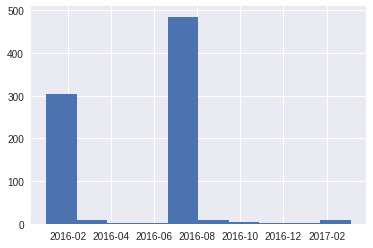

In [2]:
#Take Freq of store open date
df_air_visit_data.groupby('air_store_id')['visit_date'].min().hist()

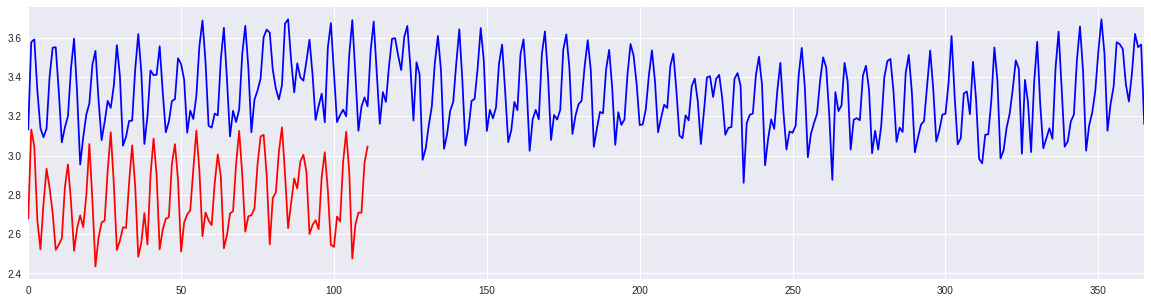

In [40]:
#Take the stores which have data for two years and plot daily trips
eligible_stores=df_air_visit_data.groupby('air_store_id')['visit_date'].min()
stores=df_air_visit_data.groupby(['air_store_id','visit_date'])['visitors'].sum().reset_index()
stores['visitors']=np.log(1+stores['visitors'])
stores['year']=stores['visit_date'].dt.year
stores['day']=stores['visit_date'].dt.dayofyear
stores=stores.groupby(['air_store_id','day','year'])['visitors'].sum().unstack().reset_index()
stores=stores.join(eligible_stores,on='air_store_id')
stores=stores[stores['visit_date']<datetime(2016,2,1)]
stores=stores.reset_index().groupby('day')[[2016,2017]].mean()
plt.figure(figsize=(20,5))
sns.tsplot(stores[2016]+0.5,color='b')
sns.tsplot(stores[2017],color='r')

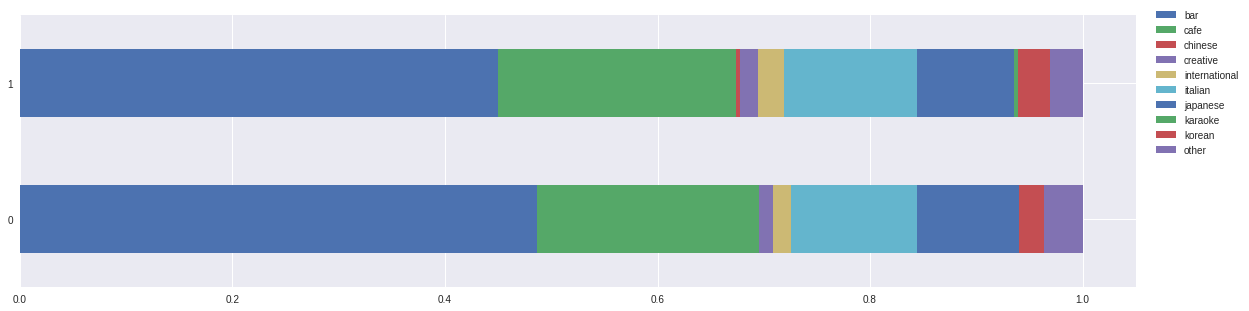

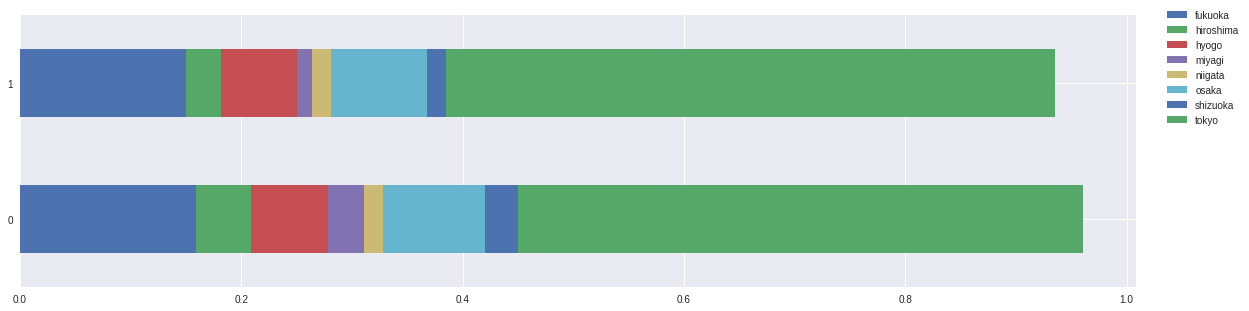

In [74]:
#Check of all new restaurants have same distribution across region, genre
stores=df_air_visit_data.groupby('air_store_id')['visit_date'].min().reset_index()
stores['flag_new']=(stores['visit_date']>=datetime(2016,2,1)).astype(np.int64)
stores=pd.merge(stores,df_store_master,left_on='air_store_id',right_on='store_id')
(pd.crosstab(stores['cuisine_clean'],stores['flag_new'])/stores['flag_new'].value_counts()).T.plot.barh(stacked=True,figsize=(20,5))
plt.legend(bbox_to_anchor=(1.1, 1.05))

(pd.crosstab(stores['prefecture'],stores['flag_new'])/stores['flag_new'].value_counts()).T.plot.barh(stacked=True,figsize=(20,5))
plt.legend(bbox_to_anchor=(1.1, 1.05))


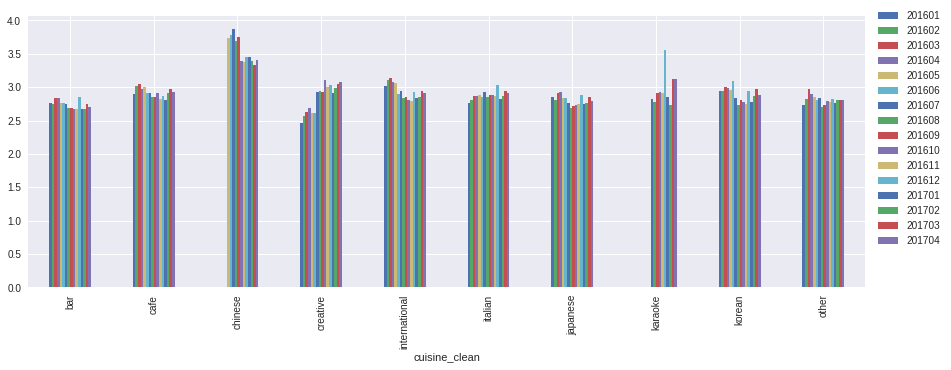

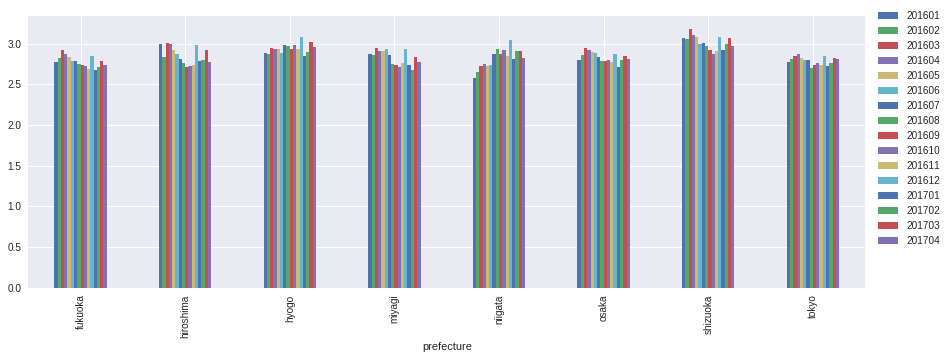

In [82]:
#Average Trips by Cuisine, State,City in Jan-June 2016, July0Dec 2016, 2017
stores=pd.merge(df_air_visit_data,df_store_master,left_on='air_store_id',right_on='store_id')
stores['timeframe']=stores['visit_date'].map(lambda x: 1 if x<datetime(2016,7,1) else 2 if x<datetime(2017,1,1) else 3)
stores['timeframe']=stores['visit_date'].map(lambda x: 100*x.year+x.month)
stores['visitors']=np.log(1+stores['visitors'])

stores.groupby(['cuisine_clean','timeframe'])['visitors'].mean().unstack().plot.bar(figsize=(15,5))
plt.legend(bbox_to_anchor=(1.1, 1.05))

stores.groupby(['prefecture','timeframe'])['visitors'].mean().unstack().plot.bar(figsize=(15,5))
plt.legend(bbox_to_anchor=(1.1, 1.05))


In [54]:
prediction=pd.read_csv('03.Submissions/11.ReservationData_Normalised_Complete.csv',parse_dates=['visit_date'])
! wc -l 03.Submissions/11.ReservationData_Normalised_Complete.csv

27671 03.Submissions/11.ReservationData_Normalised_Complete.csv


In [47]:
prediction=pd.read_csv('03.Submissions/10.ReservationData_Validation_Complete.csv',parse_dates=['visit_date'])
! wc -l 03.Submissions/11.ReservationData_Normalised_Complete.csv

27671 03.Submissions/11.ReservationData_Normalised_Complete.csv


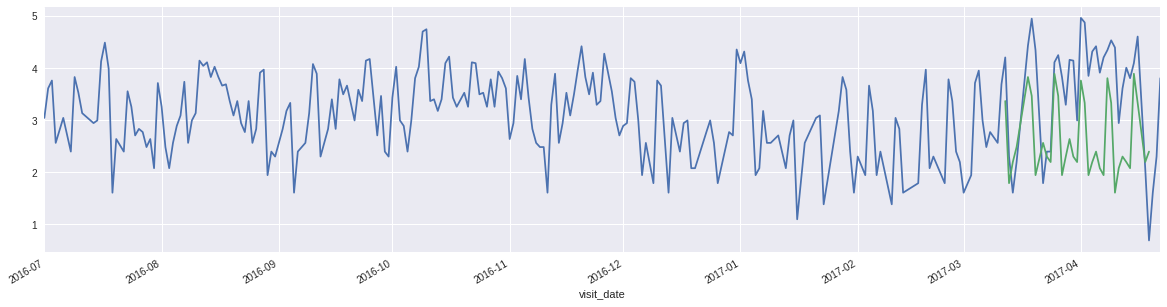

In [55]:
sample_1=df_air_visit_data[df_air_visit_data['air_store_id']=='air_f267dd70a6a6b5d3']
sample_2=prediction[prediction['air_store_id']=='air_f267dd70a6a6b5d3']

plt.figure(figsize=(20,5))
pd.Series(np.log(1+sample_1['visitors']).tolist(),index=sample_1['visit_date']).sort_index().plot()
pd.Series(np.log(1+sample_2['visitors_x']).tolist(),index=sample_2['visit_date']).sort_index().plot()

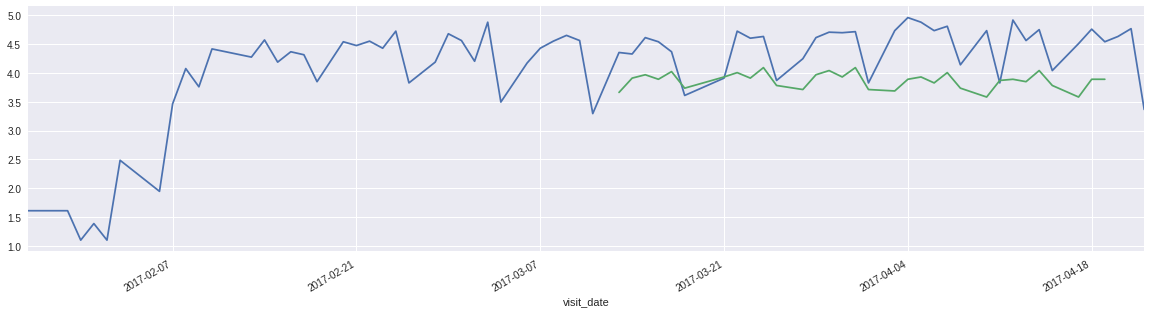

In [49]:
sample_1=df_air_visit_data[df_air_visit_data['air_store_id']=='air_9c6787aa03a45586']
sample_2=prediction[prediction['air_store_id']==y'air_9c6787aa03a45586']

plt.figure(figsize=(20,5))
pd.Series(np.log(1+sample_1['visitors']).tolist(),index=sample_1['visit_date']).sort_index().plot()
pd.Series(np.log(1+sample_2['visitors_x']).tolist(),index=sample_2['visit_date']).sort_index().plot()

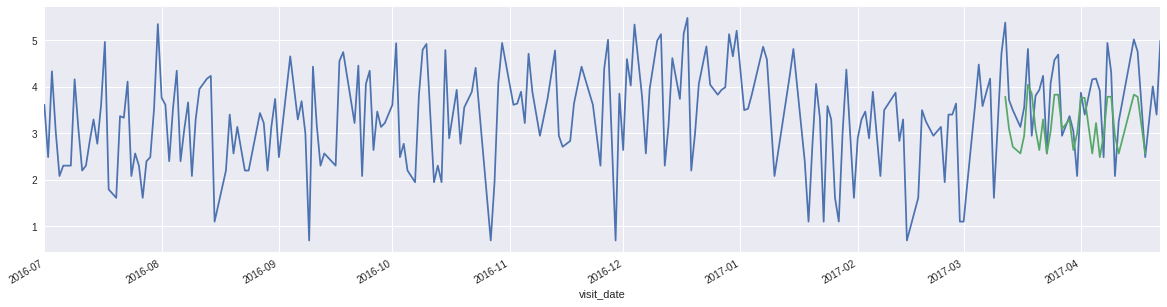

In [50]:
sample_1=df_air_visit_data[df_air_visit_data['air_store_id']=='air_7514d90009613cd6']
sample_2=prediction[prediction['air_store_id']=='air_7514d90009613cd6']

plt.figure(figsize=(20,5))
pd.Series(np.log(1+sample_1['visitors']).tolist(),index=sample_1['visit_date']).sort_index().plot()
pd.Series(np.log(1+sample_2['visitors_x']).tolist(),index=sample_2['visit_date']).sort_index().plot()

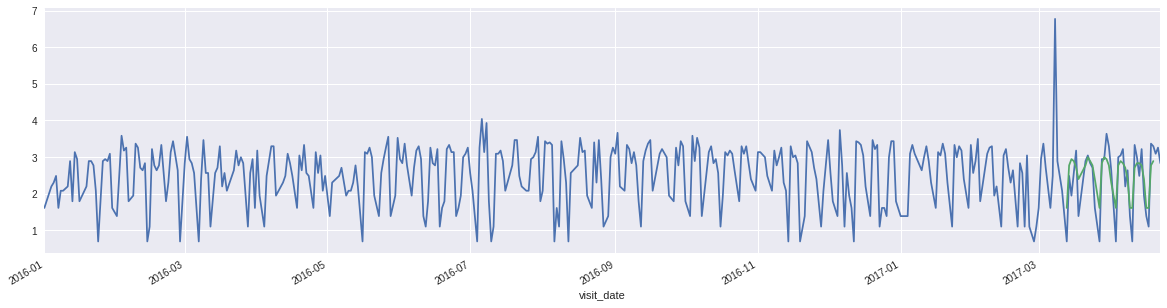

In [51]:
sample_1=df_air_visit_data[df_air_visit_data['air_store_id']=='air_cfdeb326418194ff']
sample_2=prediction[prediction['air_store_id']=='air_cfdeb326418194ff']

plt.figure(figsize=(20,5))
pd.Series(np.log(1+sample_1['visitors']).tolist(),index=sample_1['visit_date']).sort_index().plot()
pd.Series(np.log(1+sample_2['visitors_x']).tolist(),index=sample_2['visit_date']).sort_index().plot()

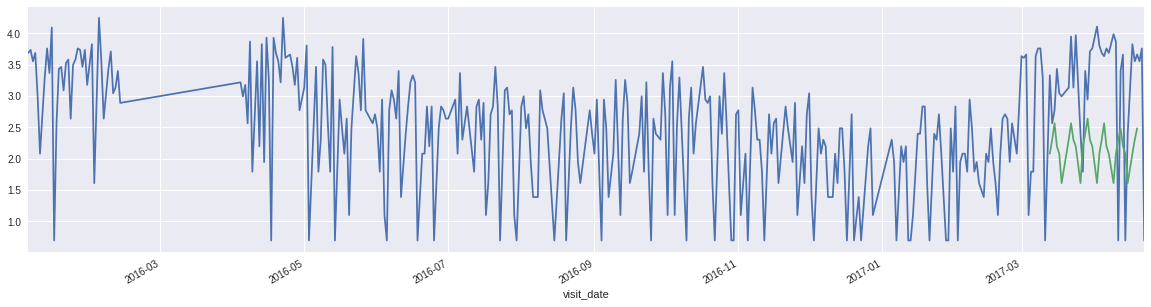

In [52]:
sample_1=df_air_visit_data[df_air_visit_data['air_store_id']=='air_93dd7070c9bf5453']
sample_2=prediction[prediction['air_store_id']=='air_93dd7070c9bf5453']

plt.figure(figsize=(20,5))
pd.Series(np.log(1+sample_1['visitors']).tolist(),index=sample_1['visit_date']).sort_index().plot()
pd.Series(np.log(1+sample_2['visitors_x']).tolist(),index=sample_2['visit_date']).sort_index().plot()

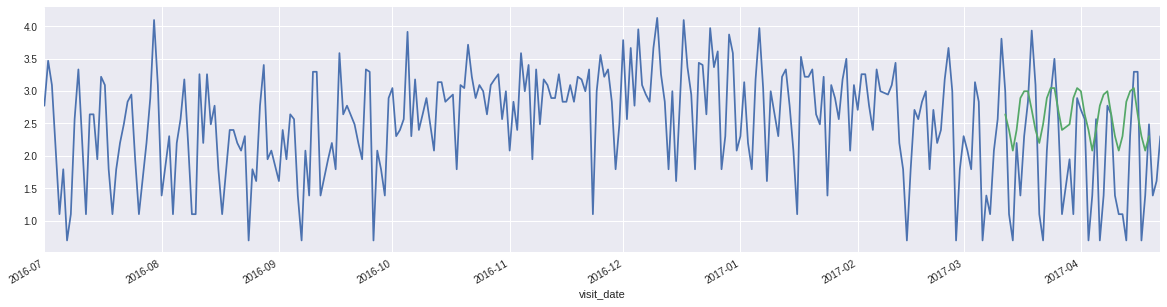

In [53]:
sample_1=df_air_visit_data[df_air_visit_data['air_store_id']=='air_fdc02ec4a3d21ea4']
sample_2=prediction[prediction['air_store_id']=='air_fdc02ec4a3d21ea4']

plt.figure(figsize=(20,5))
pd.Series(np.log(1+sample_1['visitors']).tolist(),index=sample_1['visit_date']).sort_index().plot()
pd.Series(np.log(1+sample_2['visitors_x']).tolist(),index=sample_2['visit_date']).sort_index().plot()

In [20]:
prediction.shape

(36, 31)

In [ ]:
sample=pd.merge(df_air_visit_data,df_store_master,on=['air_store_id'])
sample=sample[sample['']]